In [2]:
# Required Libraries
#install.packages(c("igraph", "tm", "wordcloud", "slam"))
library(igraph)
library(tm)
library(wordcloud)

# Load the graph from the GraphML file
g <- read.graph("backward_citation_network_with_extended_metadata.graphml", format = "graphml")

# Extract titles from the graph
titles <- V(g)$v_title

# Text preprocessing
corpus <- Corpus(VectorSource(titles))
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, removeWords, stopwords("en"))
corpus <- tm_map(corpus, stripWhitespace)

# Create a term-document matrix
tdm <- TermDocumentMatrix(corpus)

# Extract common terms as topics
common_terms <- findFreqTerms(tdm, lowfreq = 5) # Adjust the frequency as needed

# Assign topics to titles
get_topic <- function(title) {
  for (term in common_terms) {
    if (grepl(term, title, ignore.case = TRUE)) {
      return(term)
    }
  }
  return(NA)
}

V(g)$topic <- sapply(titles, get_topic)

# Visualization
plot(g, vertex.color = rainbow(length(unique(V(g)$topic)))[as.numeric(as.factor(V(g)$topic))], vertex.label.cex = 0.7)

# If you want a word cloud of the topics
wordcloud(names(termFreq(tdm)), termFreq(tdm), min.freq = 2)


ERROR: Error in i_set_vertex_attr(x, attr(value, "name"), index = value, value = attr(value, : Length of new attribute value must be 1 or 29, the number of target vertices, not 0


In [3]:
library(igraph)
library(tm)

# Load the graph from the GraphML file
g <- read.graph("backward_citation_network_with_extended_metadata.graphml", format = "graphml")

# Extract titles from the graph
titles <- V(g)$v_title

# Function to extract a topic from a title
get_topic <- function(title) {
  # Define common terms that might be indicative of topics
  common_terms <- c("object", "detection", "recognition", "visual", "network", "deep", "convolutional", "face", "real-time", "3D", "human", "feature", "framework", "local", "scale", "spatial", "pyramid", "pose", "segmentation", "histogram", "gradient", "challenge", "retrospective", "part", "model", "search", "selective", "proposal", "edge", "box")
  
  # Tokenize the title
  tokens <- unlist(strsplit(tolower(title), split = " "))
  
  # Find the first common term that appears in the title
  topic <- common_terms[which(common_terms %in% tokens)[1]]
  
  # If no common term is found, return NA
  if (length(topic) == 0) {
    return(NA)
  }
  
  return(topic)
}

# Assign topics to titles
V(g)$topic <- sapply(titles, get_topic)

# Visualization
plot(g, vertex.color = rainbow(length(unique(V(g)$topic)))[as.numeric(as.factor(V(g)$topic))], vertex.label.cex = 0.7)


ERROR: Error in i_set_vertex_attr(x, attr(value, "name"), index = value, value = attr(value, : Length of new attribute value must be 1 or 29, the number of target vertices, not 0


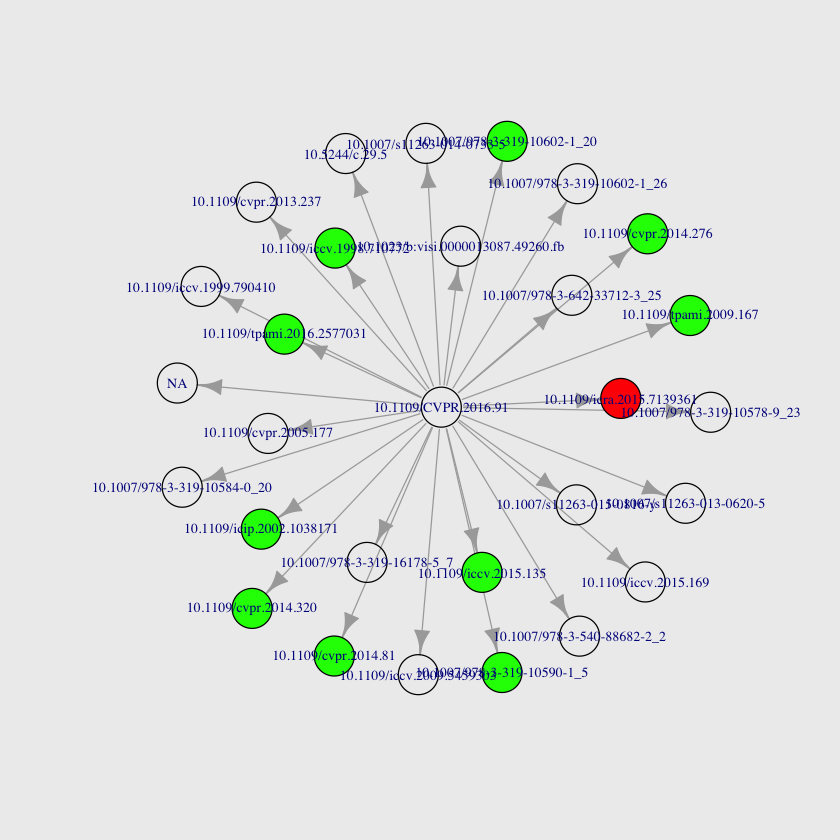

In [10]:
#install.packages("XML")
library(igraph)
library(XML)

# Function to extract topics from titles
get_topic <- function(title) {
  common_terms <- c("Object Detection", "Neural Networks", "Machine Learning", "Data Analysis", "Computer Vision")
  for (term in common_terms) {
    if (grepl(term, title, ignore.case = TRUE)) {
      return(term)
    }
  }
  return(NA)
}

par = (bgn = "#ededed")

# Read the GraphML file
g <- read_graph("backward_citation_network_with_extended_metadata.graphml", format = "graphml")

# Extract titles from the graph
titles <- V(g)$title

# Assign topics to titles
V(g)$topic <- sapply(titles, get_topic)

# Check if the length of topics matches the number of vertices
if (length(V(g)$topic) != vcount(g)) {
  V(g)$topic <- c(V(g)$topic, rep(NA, vcount(g) - length(V(g)$topic)))
}

# Visualization
par(bg = "#ededed")
plot(g, vertex.color = rainbow(length(unique(V(g)$topic)))[as.numeric(as.factor(V(g)$topic))], vertex.label.cex = 0.7, bg = "white")


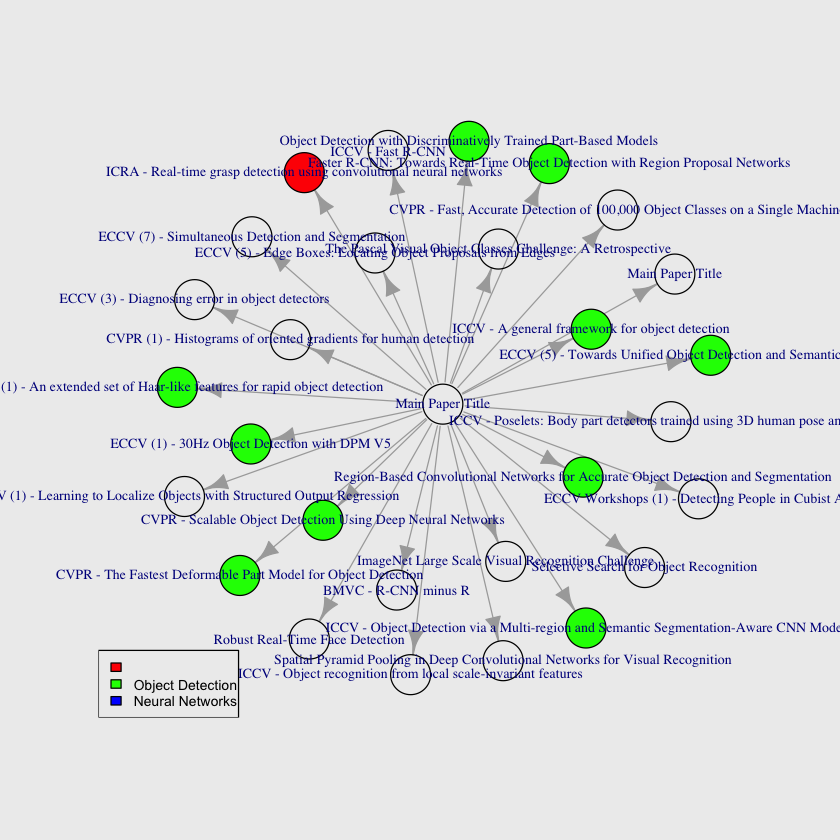

In [11]:
#install.packages("XML")
library(igraph)
library(XML)

# Function to extract topics from titles
get_topic <- function(title) {
  common_terms <- c("Object Detection", "Neural Networks", "Machine Learning", "Data Analysis", "Computer Vision")
  for (term in common_terms) {
    if (grepl(term, title, ignore.case = TRUE)) {
      return(term)
    }
  }
  return(NA)
}

# Read the GraphML file
g <- read_graph("backward_citation_network_with_extended_metadata.graphml", format = "graphml")

# Extract titles from the graph
titles <- V(g)$title

# Assign topics to titles
V(g)$topic <- sapply(titles, get_topic)

# Check if the length of topics matches the number of vertices
if (length(V(g)$topic) != vcount(g)) {
  V(g)$topic <- c(V(g)$topic, rep(NA, vcount(g) - length(V(g)$topic)))
}

# Visualization
par(bg = "#ededed")
plot(g, vertex.color = rainbow(length(unique(V(g)$topic)))[as.numeric(as.factor(V(g)$topic))], vertex.label = V(g)$title, vertex.label.cex = 0.7, bg = "white")

# Add legend
legend("bottomleft", legend = unique(V(g)$topic), fill = rainbow(length(unique(V(g)$topic))), cex = 0.7)



The downloaded binary packages are in
	/var/folders/h3/t97dnr1d7wsgh8lhwvb3g0r80000gp/T//RtmpTiO1ZX/downloaded_packages


Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("en")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, stemDocument):
"transformation drops documents"


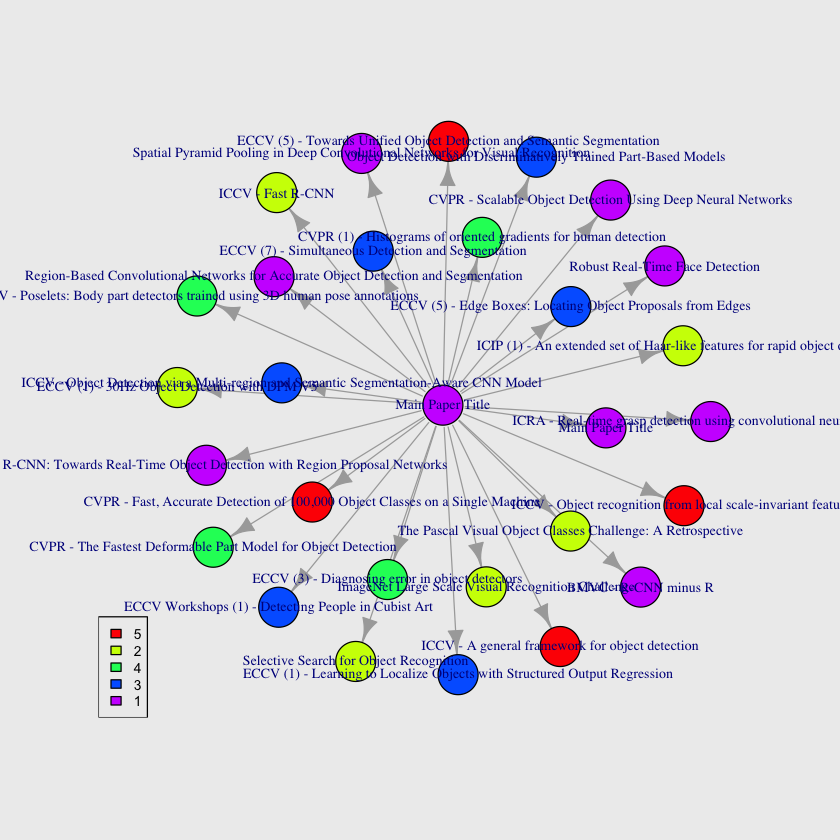

In [14]:
#install.packages("topicmodels")
install.packages("SnowballC")
library(igraph)
library(XML)
library(topicmodels)
library(tm)

# Read the GraphML file
g <- read_graph("backward_citation_network_with_extended_metadata.graphml", format = "graphml")

# Extract titles from the graph
titles <- V(g)$title

# Preprocess titles
corpus <- Corpus(VectorSource(titles))
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, removeWords, stopwords("en"))
corpus <- tm_map(corpus, stemDocument)

# Convert the preprocessed titles into a document-term matrix
dtm <- DocumentTermMatrix(corpus)

# Use LDA to identify topics (let's say we want 5 topics for simplicity)
lda <- LDA(dtm, k = 5, control = list(seed = 1234))

# Assign the most probable topic to each title
topics <- topics(lda, 1)

# Assign topics to graph vertices
V(g)$topic <- topics

# Visualization
par(bg = "#ededed")
plot(g, vertex.color = rainbow(length(unique(V(g)$topic)))[as.numeric(as.factor(V(g)$topic))], vertex.label = V(g)$title, vertex.label.cex = 0.7, bg = "white")

# Add legend
legend("bottomleft", legend = unique(V(g)$topic), fill = rainbow(length(unique(V(g)$topic))), cex = 0.7)


Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("en")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, stemDocument):
"transformation drops documents"


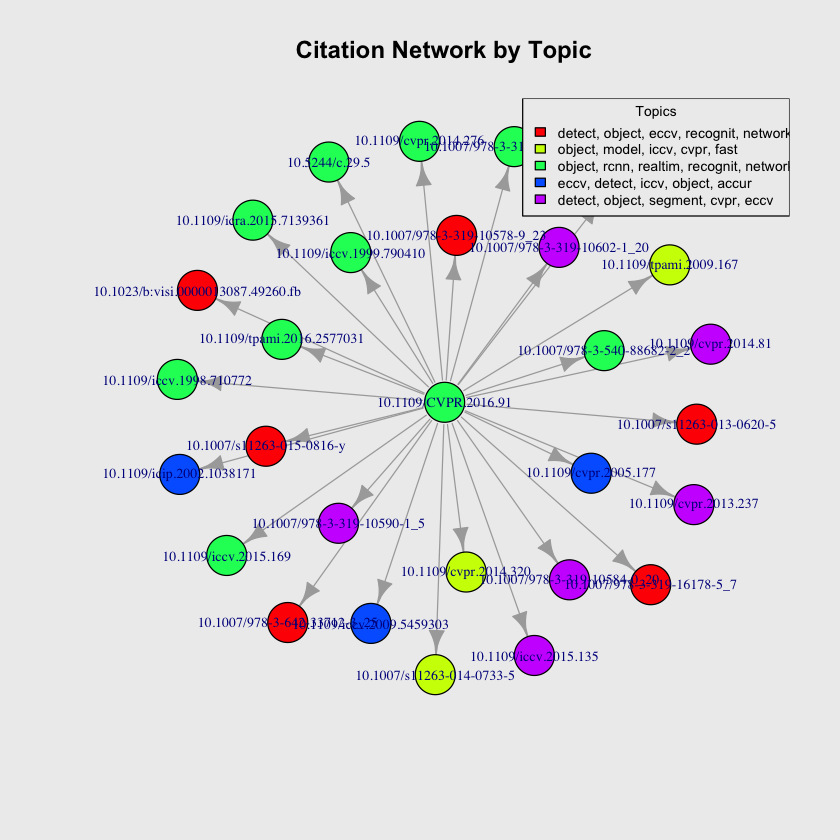

In [16]:
# Required Libraries
library(igraph)
library(XML)
library(tm)
library(topicmodels)
library(SnowballC)

# Read the GraphML file
g <- read_graph("backward_citation_network_with_extended_metadata.graphml", format = "graphml")

# Extract titles from the graph
titles <- V(g)$title

# Preprocess titles
corpus <- Corpus(VectorSource(titles))
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, removeWords, stopwords("en"))
corpus <- tm_map(corpus, stemDocument)

# Remove empty documents
corpus <- corpus[sapply(corpus, function(x) length(unlist(strsplit(as.character(unlist(x)), " "))) > 0)]

# Convert the preprocessed titles into a document-term matrix
dtm <- DocumentTermMatrix(corpus)

# Perform LDA
k <- 5  # Number of topics. Adjust as needed.
lda_model <- LDA(dtm, k = k)
topics <- topics(lda_model, 1)

# Assign topics to vertices in the graph
V(g)$topic <- topics

# Visualization
colors <- rainbow(length(unique(topics)))
legend_labels <- terms(lda_model, 5)
legend_labels <- apply(legend_labels, 2, paste, collapse=", ")

par(bg = "#ededed")
plot(g, vertex.color = colors[as.numeric(as.factor(V(g)$topic))], vertex.label.cex = 0.7, bg = "white", main = "Citation Network by Topic")
legend("topright", legend = legend_labels, fill = colors, title = "Topics", cex = 0.7)

